
![Py4Eng](img/logo.png)

# Data analysis: Pandas and Seaborn
## Yoav Ram

# [![Pandas banner](http://pandas.pydata.org/_static/pandas_logo.png)](http://pandas.pydata.org/)

_Pandas_ is a very strong library for manipulation large and complex datasets using a new data structure, the data frame. Pandas helps to close the gap between Python and R for data analysis and statistical computing.

Pandas data frames address three deficiencies of arrays:

- they hold heterogenous data; each column can have its own numpy.dtype,
- the axes of a DataFrame are labeled with column names and row indices,
- and, they account for missing values which this is not directly supported by arrays.

(See [Introduction to Python for Statistical Learning](http://www.datarobot.com/blog/introduction-to-python-for-statistical-learning/))

Data frames are extremely useful for data munging. They provide a large range of operations such as filter, join, and group-by aggregation, as well as plotting.

In [1]:
import pandas as pd
print('Pandas version:', pd.__version__)

Pandas version: 0.18.1


# Example: Statistical Analysis of Life History Traits

We will analyze animal life-history data from [AnAge](http://genomics.senescence.info/download.html#anage). 
We will get the data from the download page, but it's compressed with zip so we need to unzip it and then we can read the data using _pandas_ `read_table` function:

In [5]:
import urllib.request
import zipfile

fname = '../data/anage_dataset.zip'
urllib.request.urlretrieve('http://genomics.senescence.info/species/dataset.zip', fname)

('..\\data\\anage_dataset.zip', <http.client.HTTPMessage at 0x7dbdb70>)

In [6]:
with zipfile.ZipFile(fname) as z:
    f = z.open('anage_data.txt')
    data = pd.read_table(f) # lots of other pd.read_... functions
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(4212, 31)


_pandas_ holds data in `DataFrame` (similar to _R_).
`DataFrame` have a single row per observation (in contrast to the previous exercise in which each table cell was one observation), and each column has a single variable. Variables can be numbers or strings.

In [7]:
data.head()

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
0,4,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7,...,NaN,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN,"2,20,32,47,53,68,69,240,241,242,243,274,602,98..."
1,5,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,NaN,...,812,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"63,407,408,741,805,806,808,812,815,828,830,831..."
2,7,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,NaN,...,411,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"411,813,814"
3,8,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Bicyclus,anynana,Squinting bush brown,15,...,811,wild,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"418,809,811"
4,9,Animalia,Arthropoda,Malacostraca,Decapoda,Nephropidae,Homarus,americanus,American lobster,NaN,...,2,wild,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"2,13,594"


`DataFrame` has many of the features of `numpy.ndarray` - it also has a `shape` and various statistical methods (`max`, `mean` etc.).
However, `DataFrame` allows richer indexing.
For example, let's browse our data for species that have body mass greater than 300 kg.
First we will a new column that tells us if a row is a large animal row or not:

In [8]:
large_index = data['Body mass (g)'] > 300 * 1000 # 300 kg
large_index.head()

0    False
1    False
2    False
3    False
4    False
Name: Body mass (g), dtype: bool

Now, we slice or data with this boolean index. 
The `iterrows` method let's us iterate over the rows of the data.
For each row we get both the row as a `Series` object (similar to `dict` for our use)
and the row number as an `int`.

In [9]:
large_data = data[large_index]
for i, row in large_data.iterrows(): 
    print(row['Common name'], row['Body mass (g)']/1000, 'kg')

Domestic cattle 347.0 kg
Dromedary 407.0 kg
Moose 325.0 kg
Asian elephant 3672.0 kg
West Indian manatee 450.0 kg


So... a [Dromedary](http://en.wikipedia.org/wiki/Dromedary) is a Camel.

Let's continue with small and medium animals. For starters, let's plot a scatter of Body mass vs. Metabolic rate.
Because we work with _pandas_, we can do that with the `plot` method of `DataFrame`, specifying the columns for `x` and `y` and a plotting style (without the style we would get a line plot which makes no sense here).

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

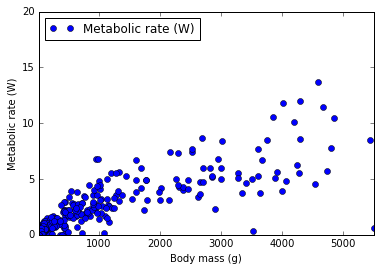

In [11]:
data = data[data['Body mass (g)'] < 3e5] 
data.plot(x='Body mass (g)', y='Metabolic rate (W)', style='o')
plt.ylabel('Metabolic rate (W)')
plt.ylim(0, 20);

From this plot it seems that 1) there is a correlation between body mass and metabolic rate, and 2) there are many small animals (less than 30 kg) and not many medium animals (between 50 and 300 kg).

Before we continue, I prefer to have mass in kg, let's add a new column:

In [12]:
data['Body mass (kg)'] = data['Body mass (g)'] / 1000

Next, let's check how many records do we have for each Class (as in the taxonomic unit): 

In [13]:
class_counts = data.Class.value_counts()
print(class_counts)

Mammalia    417
Aves        171
Amphibia     18
Reptilia     16
Name: Class, dtype: int64


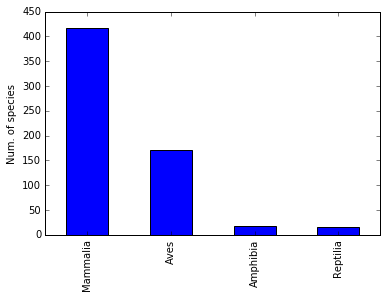

In [14]:
class_counts.plot(kind='bar')
plt.ylabel('Num. of species');

So we have lots of mammals and birds, and a few reptiles and amphibians. This is important as amphibian and reptiles could have a different replationship between mass and metabolism because they are cold blooded.

In [15]:
data[data.Class == 'Reptilia']

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References,Body mass (kg)
3653,3673,Animalia,Chordata,Reptilia,Crocodilia,Alligatoridae,Alligator,mississippiensis,American alligator,4380,...,captivity,large,high,NaN,NaN,0.153900,1079.0,295.31,"19,37,485,527,586,1142",1.0790
3674,3694,Animalia,Chordata,Reptilia,Rhynchocephalia,Sphenodontidae,Sphenodon,punctatus,Tuatara,4380,...,captivity,medium,acceptable,NaN,NaN,0.060500,430.0,295.50,"37,451,527",0.4300
3698,3718,Animalia,Chordata,Reptilia,Squamata,Anguidae,Elgaria,multicarinata,Southern alligator lizard,NaN,...,captivity,small,acceptable,NaN,NaN,0.013200,31.5,295.50,"37,451",0.0315
3703,3723,Animalia,Chordata,Reptilia,Squamata,Boidae,Boa,constrictor,Common boa constrictor,1095,...,captivity,large,acceptable,NaN,NaN,0.358900,3532.0,293.00,"37,448,485,527",3.5320
3789,3809,Animalia,Chordata,Reptilia,Squamata,Colubridae,Natrix,natrix,Grass snake,1460,...,captivity,medium,acceptable,NaN,NaN,0.029500,94.2,290.25,"19,37,451,527",0.0942
3915,3935,Animalia,Chordata,Reptilia,Squamata,Iguanidae,Dipsosaurus,dorsalis,Desert iguana,NaN,...,captivity,medium,acceptable,NaN,NaN,0.044100,69.5,305.50,"37,485",0.0695
3924,3944,Animalia,Chordata,Reptilia,Squamata,Lacertidae,Lacerta,viridis,European green lizard,NaN,...,unknown,medium,acceptable,NaN,NaN,0.003370,15.7,293.83,"37,527",0.0157
3953,3973,Animalia,Chordata,Reptilia,Squamata,Pythonidae,Python,molurus,Indian python,1095,...,captivity,large,acceptable,NaN,NaN,1.266100,12370.0,303.00,"37,448,485",12.3700
3955,3975,Animalia,Chordata,Reptilia,Squamata,Pythonidae,Python,reticulatus,Reticulate python,NaN,...,captivity,medium,acceptable,NaN,NaN,2.734900,32000.0,297.50,"37,451",32.0000
3968,3988,Animalia,Chordata,Reptilia,Squamata,Scincidae,Eumeces,obsoletus,Great Plains skink,NaN,...,captivity,small,acceptable,NaN,NaN,0.020600,30.0,300.50,"37,451",0.0300


## Exercise

Check how many flies there are in this dataset. Extract the `Common name` column, use the `.str` attribute to get a string representation, then use the string method `contains`. The result is a series of booleans which you can sum with the `sum` method.

# Seaborn

Let's do a simple linear regression plot; but let's do it in separate for each Class. We can do this kind of thing with *Matplotlib* and *Scipy*, but a very good tool for statistical visualizations is **[Seaborn](http://stanford.edu/~mwaskom/software/seaborn/index.html)**.

_Seaborn_ adds on top of _Pandas_ a set of sophisticated statistical visualizations, similar to *ggplot* for R.

Unfortunately, _Seaborn_ doesn't ship with *Anaconda* so we need to install it manually. The best way is to use _conda_ or  _pip_:
`conda install seaborn` or `pip install seaborn`.

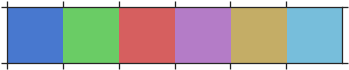

In [16]:
import seaborn as sns
sns.set_style("ticks")   # control the plotting style
sns.set_context("talk")  # set to talk because this is a lecture! hit shift-tab after the "(" to see other options.
sns.set_palette("muted") # many color palettes to choose from
sns.palplot(sns.color_palette('muted')) # this is the color palette we chose

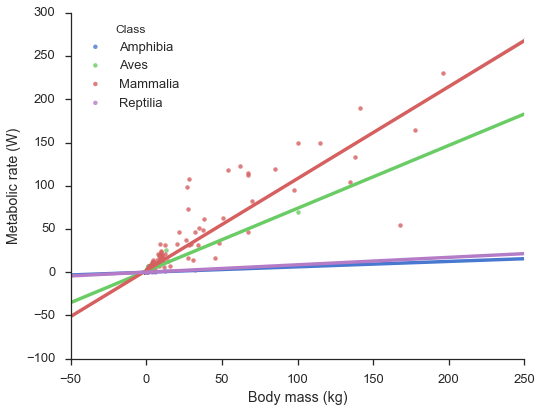

In [17]:
sns.lmplot(
    x='Body mass (kg)', 
    y='Metabolic rate (W)', 
    hue='Class', 
    data=data, 
    ci=False, 
    size=6, 
    aspect=1.3,
    legend_out=False
);

Note that `hue` means _color_, but it also causes _seaborn_ to fit a different linear model to each of the Classes. 
As for the last 3 paramteres:
- `ci` controls the confidence intervals. I chose `False`, but setting it to `True` will show them.
- `size` controls the size of the plot
- `legend_out` decides if the legend is inside the plot or outside. We have enough space for it in the left corner.

We can see that mammals and birds have a clear correlation between size and metabolism and that it extends over a nice range of mass, so let's stick to mammals; next up we will see which Orders of mammals we have.

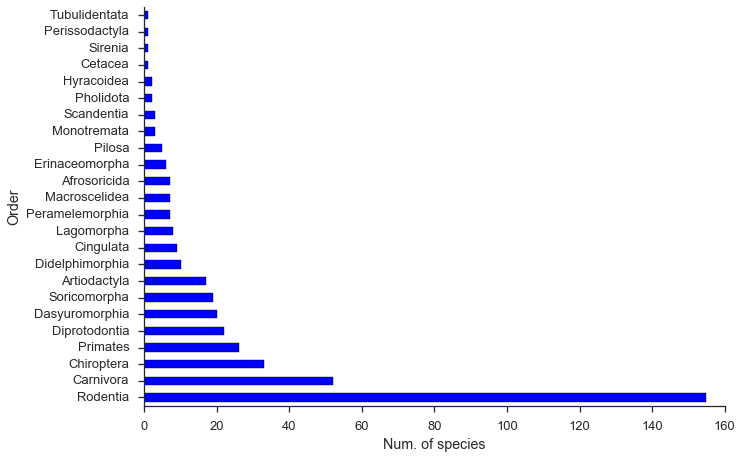

In [18]:
mammalia = data[data.Class=='Mammalia']
order_counts = mammalia.Order.value_counts()
ax = order_counts.plot.barh()
ax.set(
    xlabel='Num. of species',
    ylabel='Order'
)
sns.despine();

You see we have alot of rodents and carnivores, but also a good number of bats (_Chiroptera_) and primates.

Let's continue only with orders that have at least 20 species - this also includes some cool marsupials like Kangaroo, Koala and [Taz](http://upload.wikimedia.org/wikipedia/en/c/c4/Taz-Looney_Tunes.svg) (Diprotodontia and Dasyuromorphia)

In [19]:
orders = order_counts[order_counts >= 20]
print(orders)
abund_mammalia = mammalia[mammalia.Order.isin(orders.index)]

Rodentia          155
Carnivora          52
Chiroptera         33
Primates           26
Diprotodontia      22
Dasyuromorphia     20
Name: Order, dtype: int64


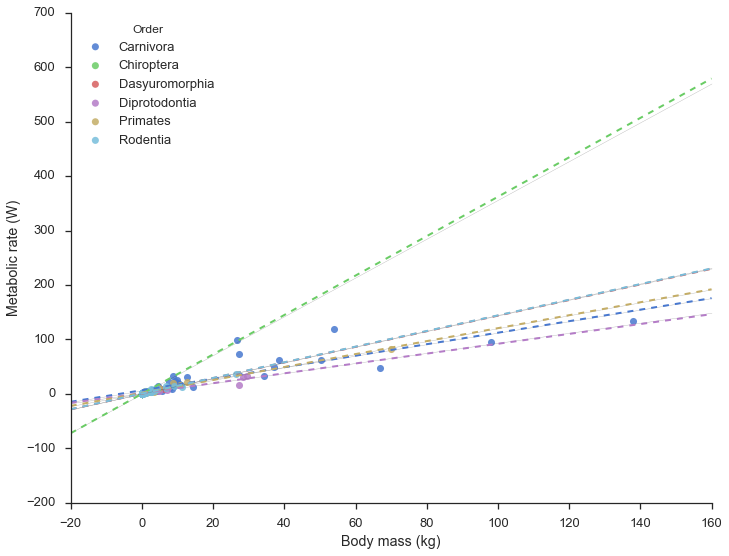

In [20]:
sns.lmplot(
    x='Body mass (kg)', 
    y='Metabolic rate (W)', 
    hue='Order',
    data=abund_mammalia, 
    ci=False, 
    size=8,
    aspect=1.3,
    legend_out=False, 
    line_kws={'lw':2, 'ls':'--'}, 
    scatter_kws={'s':50, 'alpha':0.85}
);

Because there is alot of data here I made the lines thinner - this can be done by giving _matplotlib_ keywords as a dictionary to the argument `line_kws` - and I made the markers bigger but with alpha (transperancy) 0.5 using the `scatter_kws` argument.

Still ,there's too much data, and part of the problem is that some Orders are large - primates - and some are small - rodents.
Let's plot a separate plot for each Order. We do this using the `col` and `row` arguments of `lmplot`, but in general this can be done for any plot using [_seaborn_'s `FacetGrid` function](http://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html).

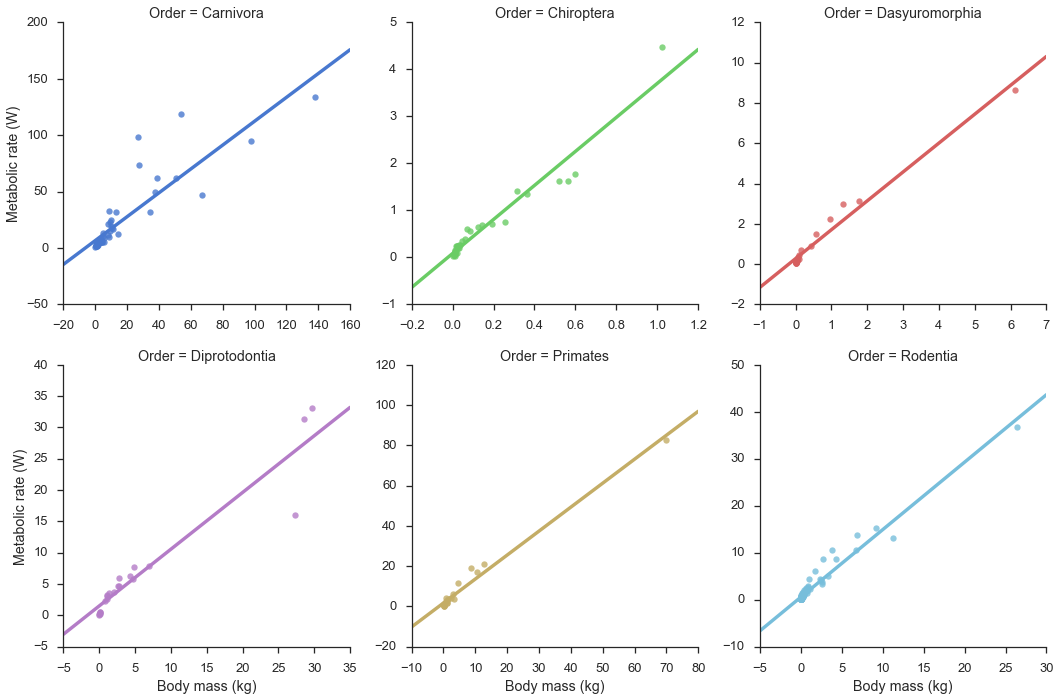

In [21]:
sns.lmplot(
    x='Body mass (kg)', 
    y='Metabolic rate (W)', 
    data=abund_mammalia, 
    hue="Order", 
    col="Order", 
    col_wrap=3, 
    ci=None, 
    scatter_kws={'s':40}, 
    sharex=False, 
    sharey=False
);

We used the `sharex=False` and `sharey=False` arguments so that each Order will have a different axis range and so the data is will spread nicely.
Last but not least, let's have a closer look at the corelation between mass and metabolism in primates. 
We will do a joint plot which will give us the pearson correlation and the distribution of each parameter.

Blue monkey | Brown lemur | Calabar angwantibo | Demidoff's galago | Fat-tailed dwarf lemur | Geoffroy's tamarin | Greater galago | Guereza | Hamadryas baboon | Human | Mantled howler monkey | Northern night monkey | Patas monkey | Philippine tarsier | Potto | Pygmy marmoset | Senegal galago | Slender loris | Slow loris | Small-eared galago | South African galago | South American squirrel monkey | Spectral tarsier | Verreaux's sifaka | Western needle-clawed galago | White-tufted-ear marmoset


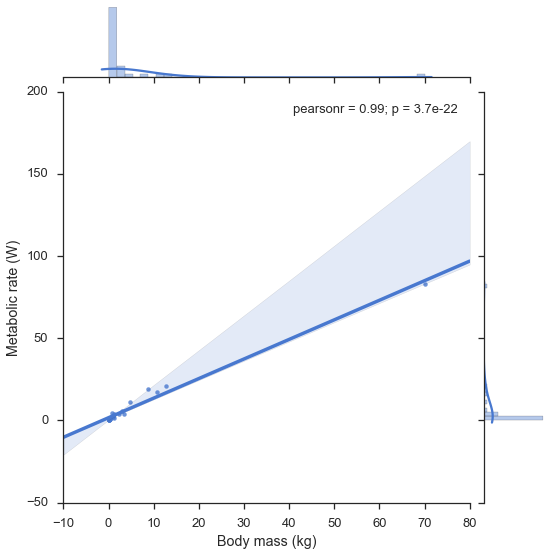

In [22]:
primates = mammalia[mammalia.Order == 'Primates']
print(' | '. join(sorted(primates["Common name"])))
sns.jointplot(
    x='Body mass (kg)', 
    y='Metabolic rate (W)', 
    data=primates, 
    kind='reg', 
    size=8
);

# References

- Examples: [Seaborn example gallery](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html)
- Slides: [Statistical inference with Python](https://docs.google.com/presentation/d/1imQAEmNg4GB3bCAblauMOOLlAC95-XvkTSKB1_dB3Tg/pub?slide=id.p) by Allen Downey
- Book: [Think Stats](greenteapress.com/thinkstats2/html/index.html) by Allen Downey - statistics with Python. Free Ebook.
- Blog post: [A modern guide to getting started with Data Science and Python](http://twiecki.github.io/blog/2014/11/18/python-for-data-science/)
- Tutorial: [An Introduction to Pandas](http://www.synesthesiam.com/posts/an-introduction-to-pandas.html)

## Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com) and is part of the [_Python for Engineers_](https://github.com/yoavram/Py4Eng) course.

The notebook was written using [Python](http://python.org/) 3.6.0, [IPython](http://ipython.org/) 5.2.2, [Jupyter](http://jupyter.org) 4.3.0.

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)